# Load Models

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
import sys
base_dir = os.path.join(os.getcwd(), os.pardir, os.pardir)
sys.path.append(base_dir)

# Models
import Models.LatentFactorModels 
import Simulators.Simulator 
import Models.ModelComparer 
import numpy as np
import sklearn

import pandas as pd
pd.set_option('max_rows', 15)
import seaborn as sns
sns.set(font_scale=2)


# Assessment Machinery
eval_base_dir = os.path.join(base_dir, os.pardir, "CancerDimensionalityReduction")
sys.path.append(eval_base_dir)

import Performance.classification.CrossValidation 

# Logging

import logging
logging.basicConfig(stream=sys.stdout, level=logging.WARNING)

import ipywidgets

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Simulate Data: $N  \gg (p = 11)$

In [3]:
(m, p_0, p_1, p_2, p_3) = (2,3,5,5,1)
genModel = Models.LatentFactorModels.ThreeNodeGaussianModel(m, p_0, p_1, p_2, p_3)

In [4]:
_ = genModel.initializeParameters(psiMean = 2, wMean=20, warm_start=False)
simulator = Simulators.Simulator.Simulator(genModel)

In [5]:
np.random.seed(seed=150)
genModel = simulator.simulate(30)

[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.4s finished


#### Gather Data

In [6]:
dfc = Performance.classification.CrossValidation.DataFrameCollection(
    dependent_data=genModel.getY(), independent_data=genModel.getX())
print "N = {0}".format(dfc.independentDF.shape[0])


N = 30


# Perform Cross-Validation to Assess Train Sensitivity/ Specificity

## Logistic Regression

In [7]:
cv = Performance.classification.CrossValidation.CrossValidation(sklearn.linear_model.LogisticRegression()
                                                    , dfc , 10)
cv.cross_validate()

mean accuracy score 0.97, standard error 0.10
mean sensitivity 0.85, standard error 0.32
mean specificity 0.80, standard error 0.40
mean precision 0.90, standard error 0.30


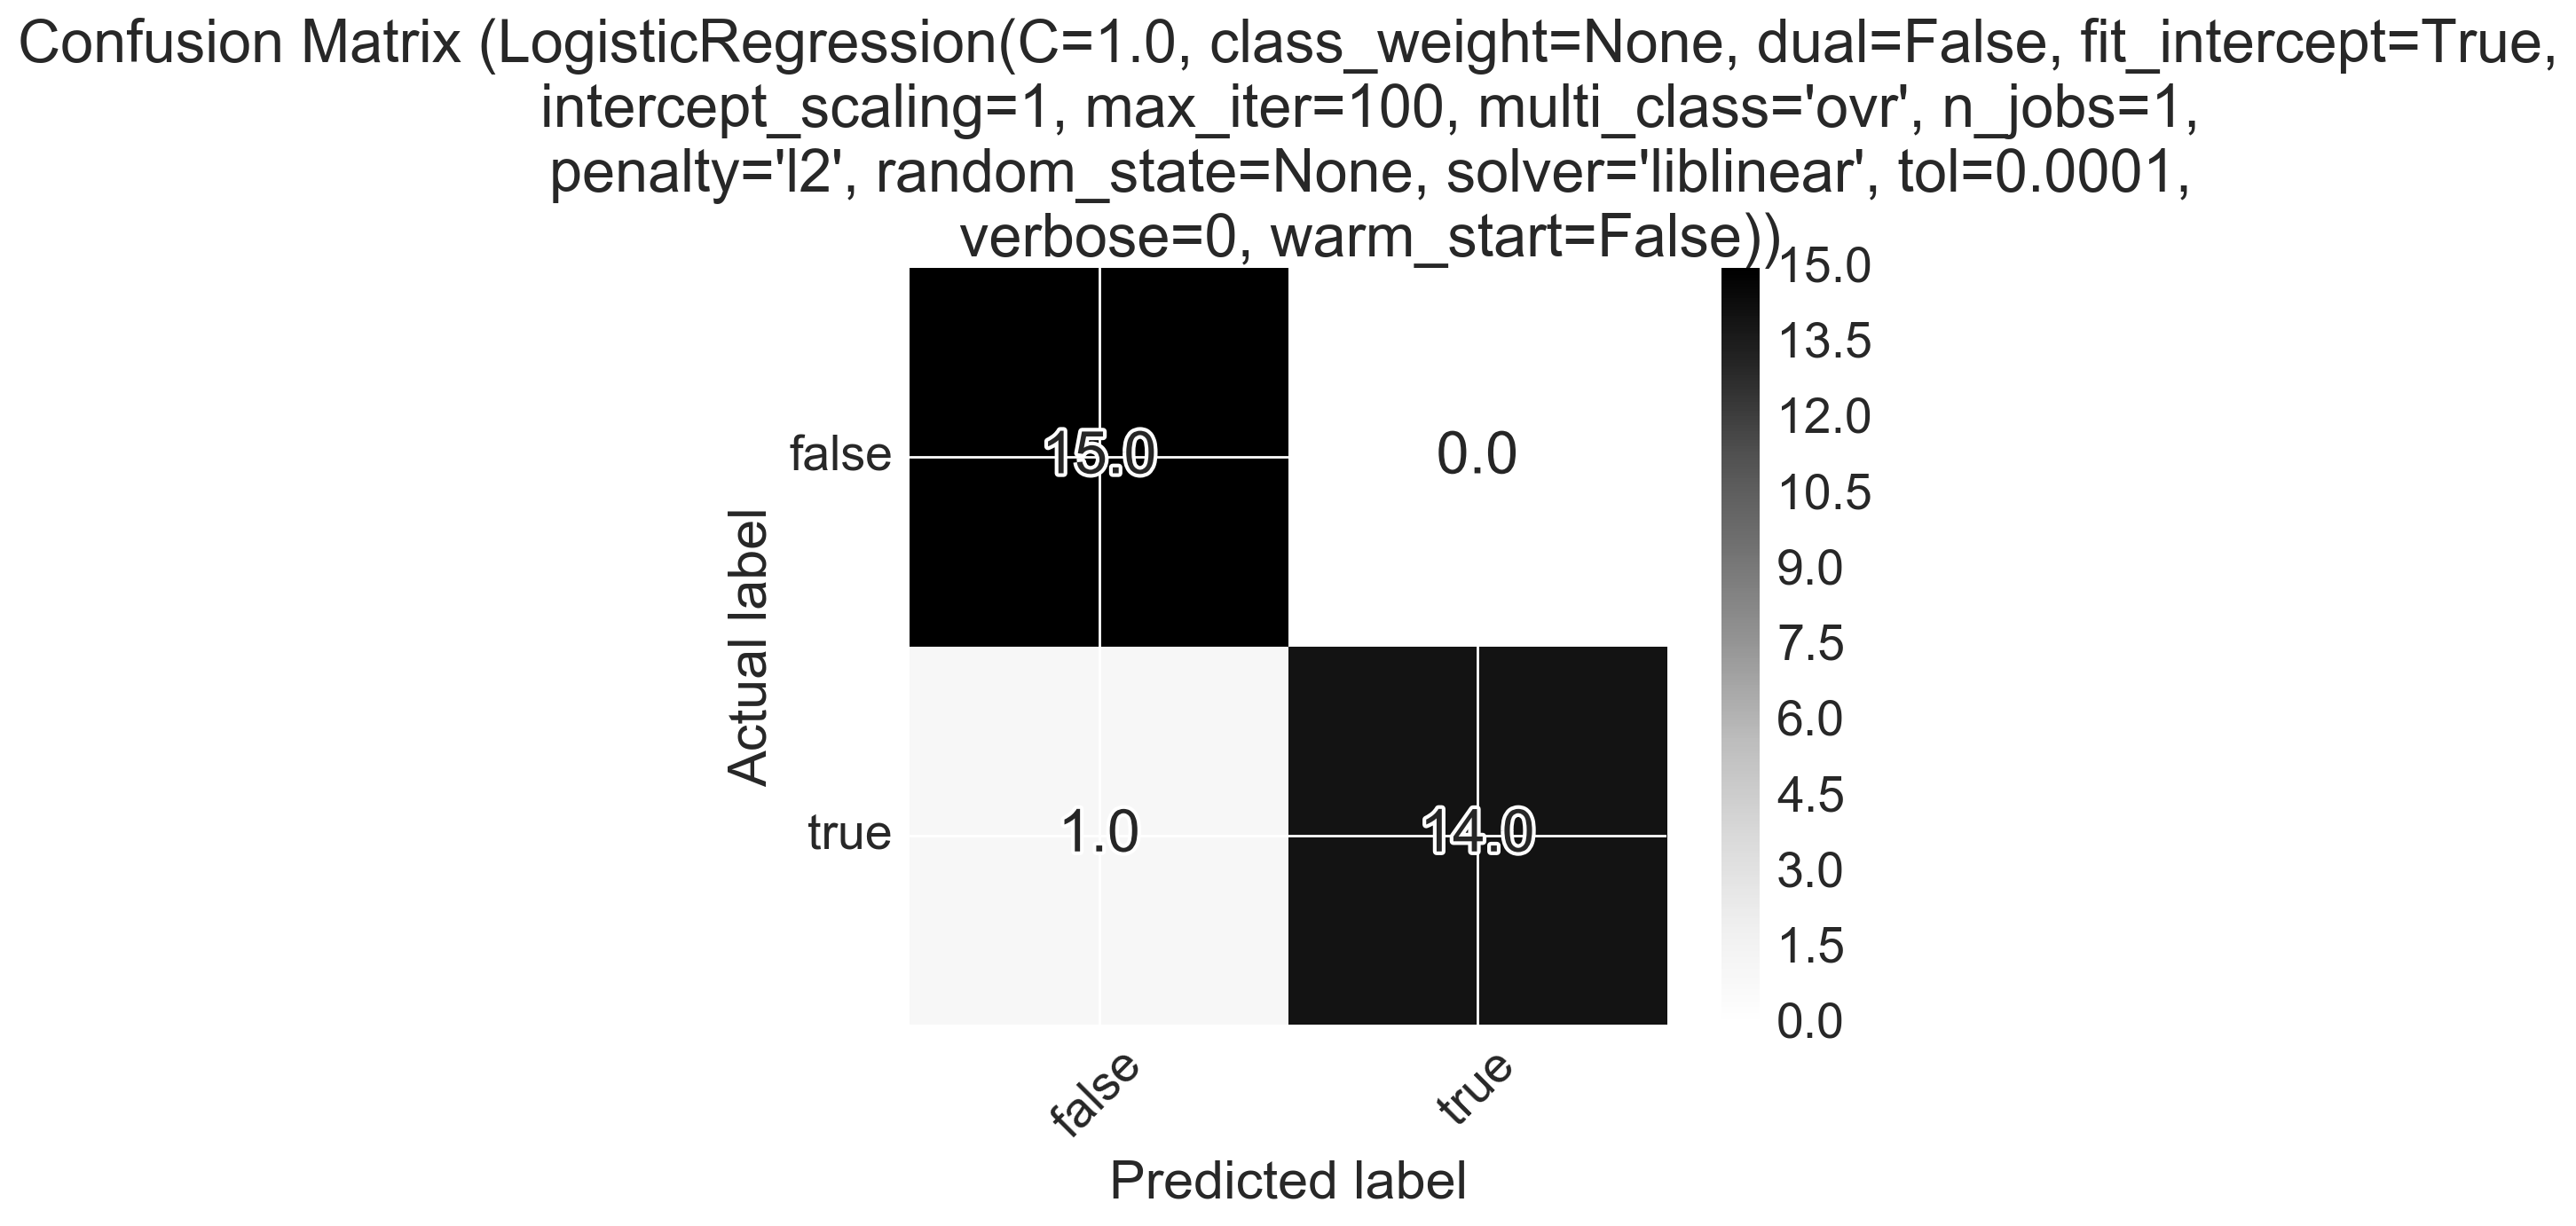

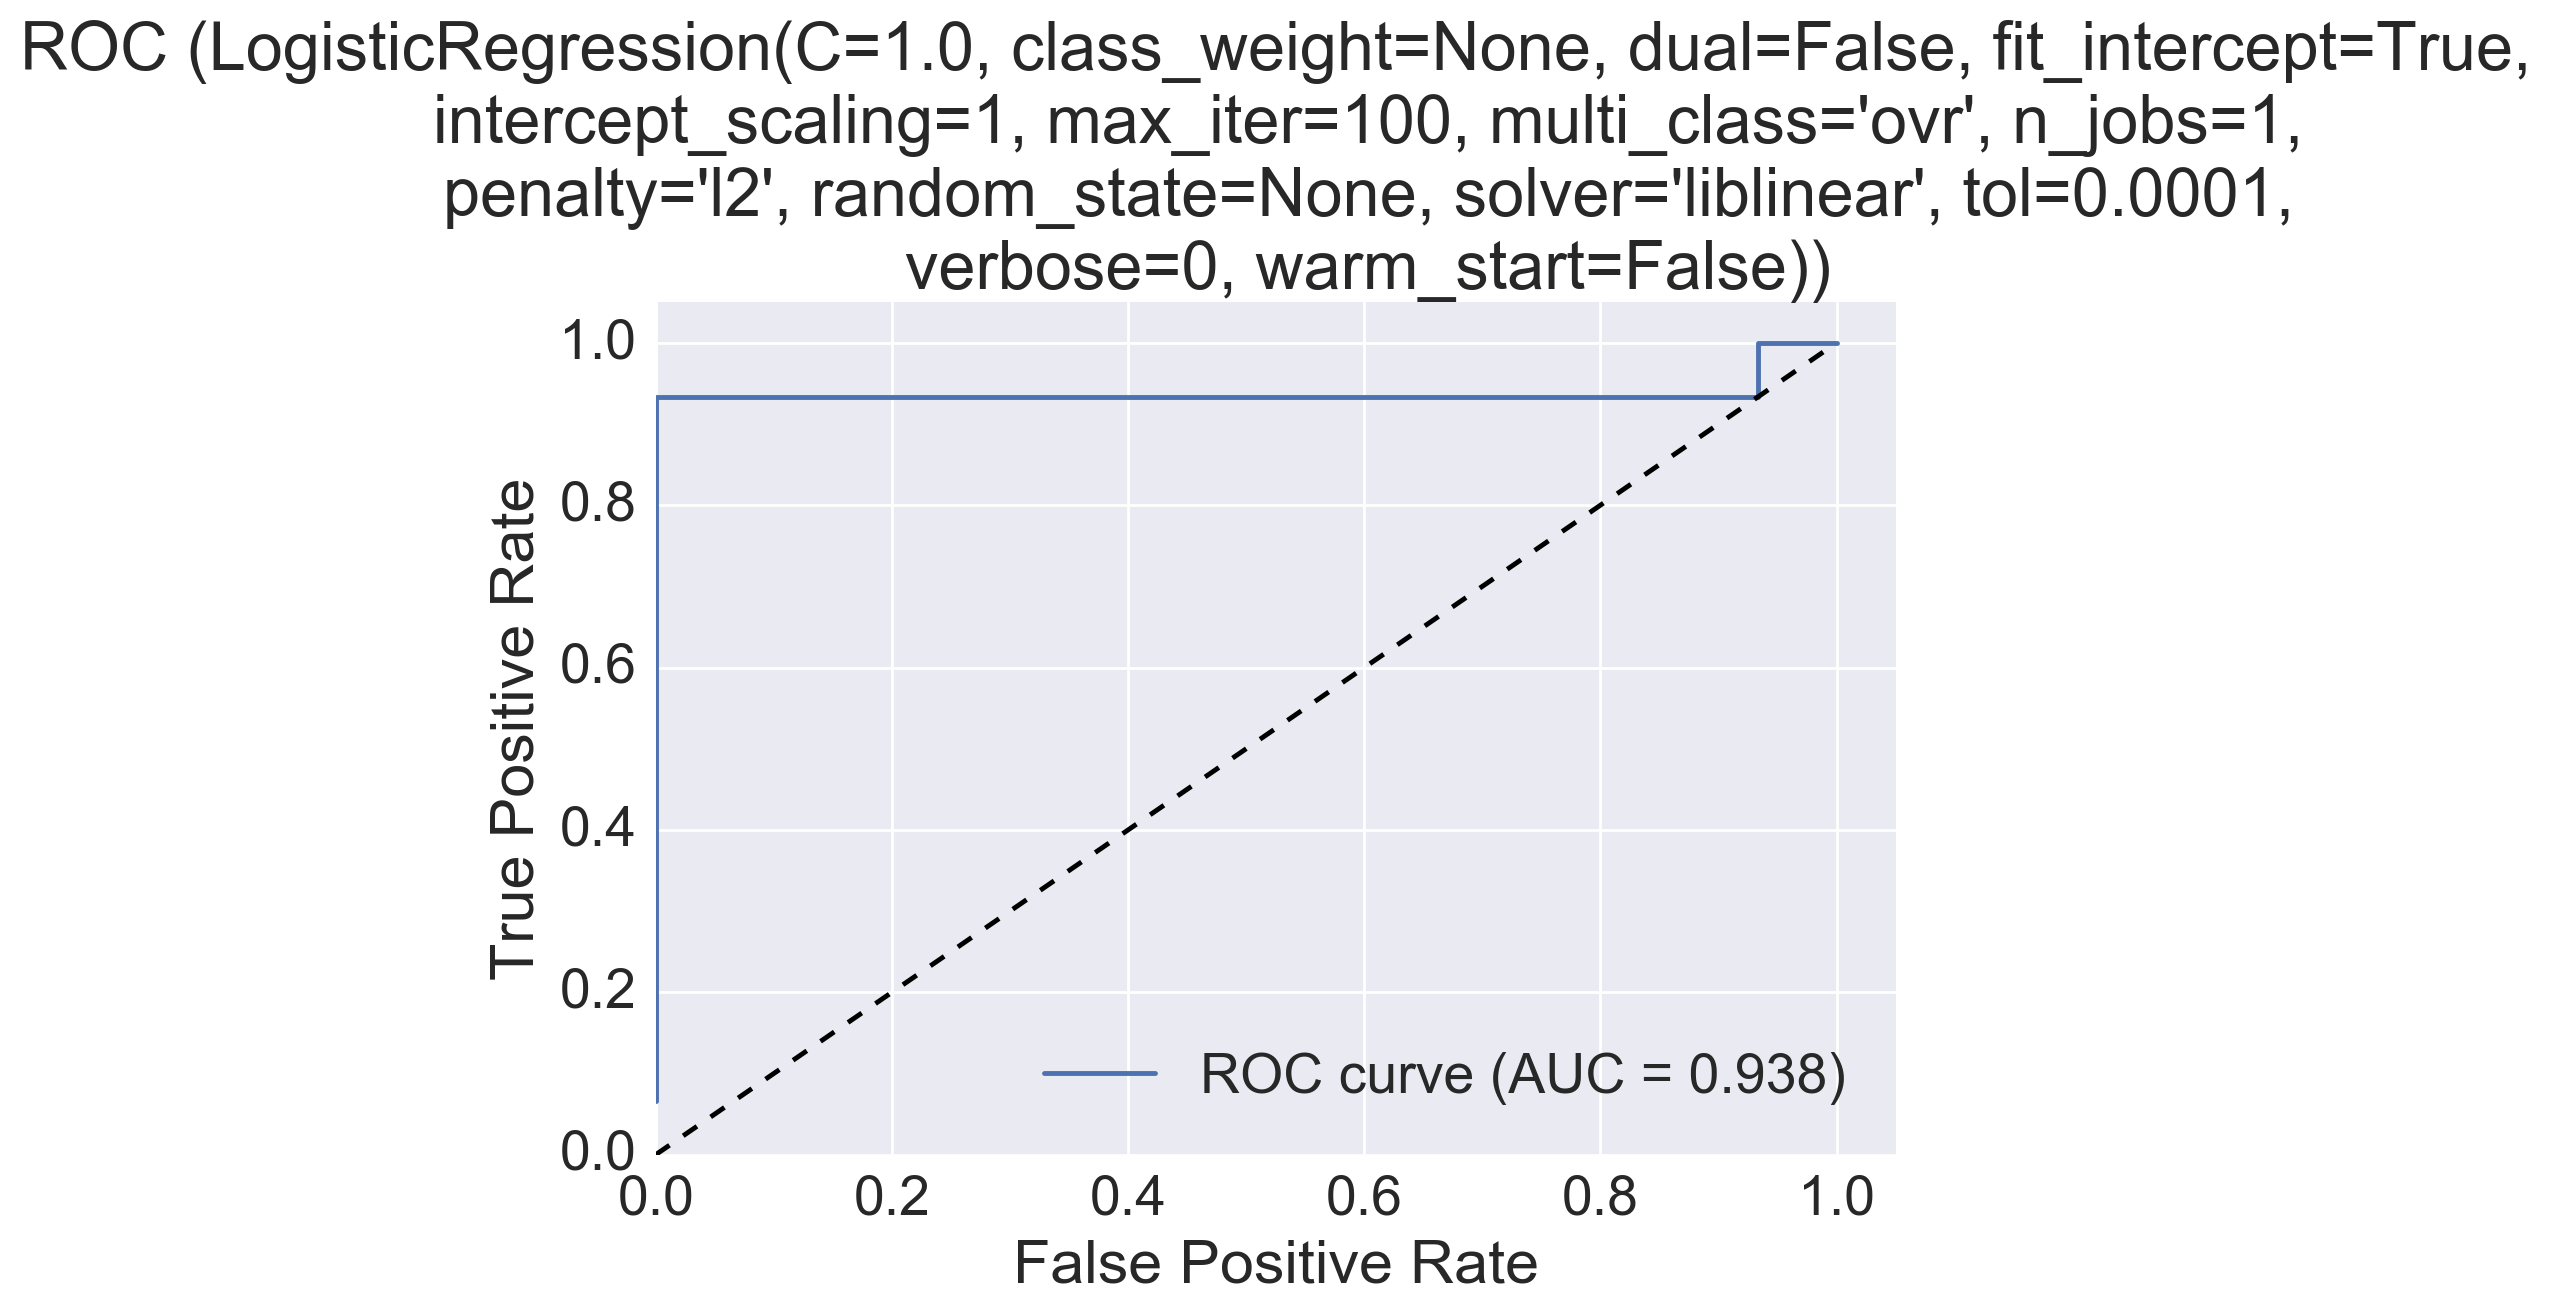

In [8]:
cv.output_results()

## MFAA

In [9]:
cv_mfaa = Performance.classification.CrossValidation.CrossValidation(
    predictorClass=Models.LatentFactorModels.ThreeNodeGaussianModel(m, p_0, p_1, p_2, p_3),
                                                         dataFrameCollection=dfc,k =10)

In [10]:
cv_mfaa.cross_validate()

/Users/ijoseph/Code/workspace/FactorAssociationAnalysisCancerGenomics/Jupyter-Notebooks/Prediction/../../Performance/classification/CrossValidation.py:74: RuntimeWarning: invalid value encountered in divide
  specificity = [TN / float(FP+ TN)])


mean accuracy score 0.90, standard error 0.15
mean sensitivity 0.77, standard error 0.33
mean specificity nan, standard error nan
mean precision 0.90, standard error 0.30


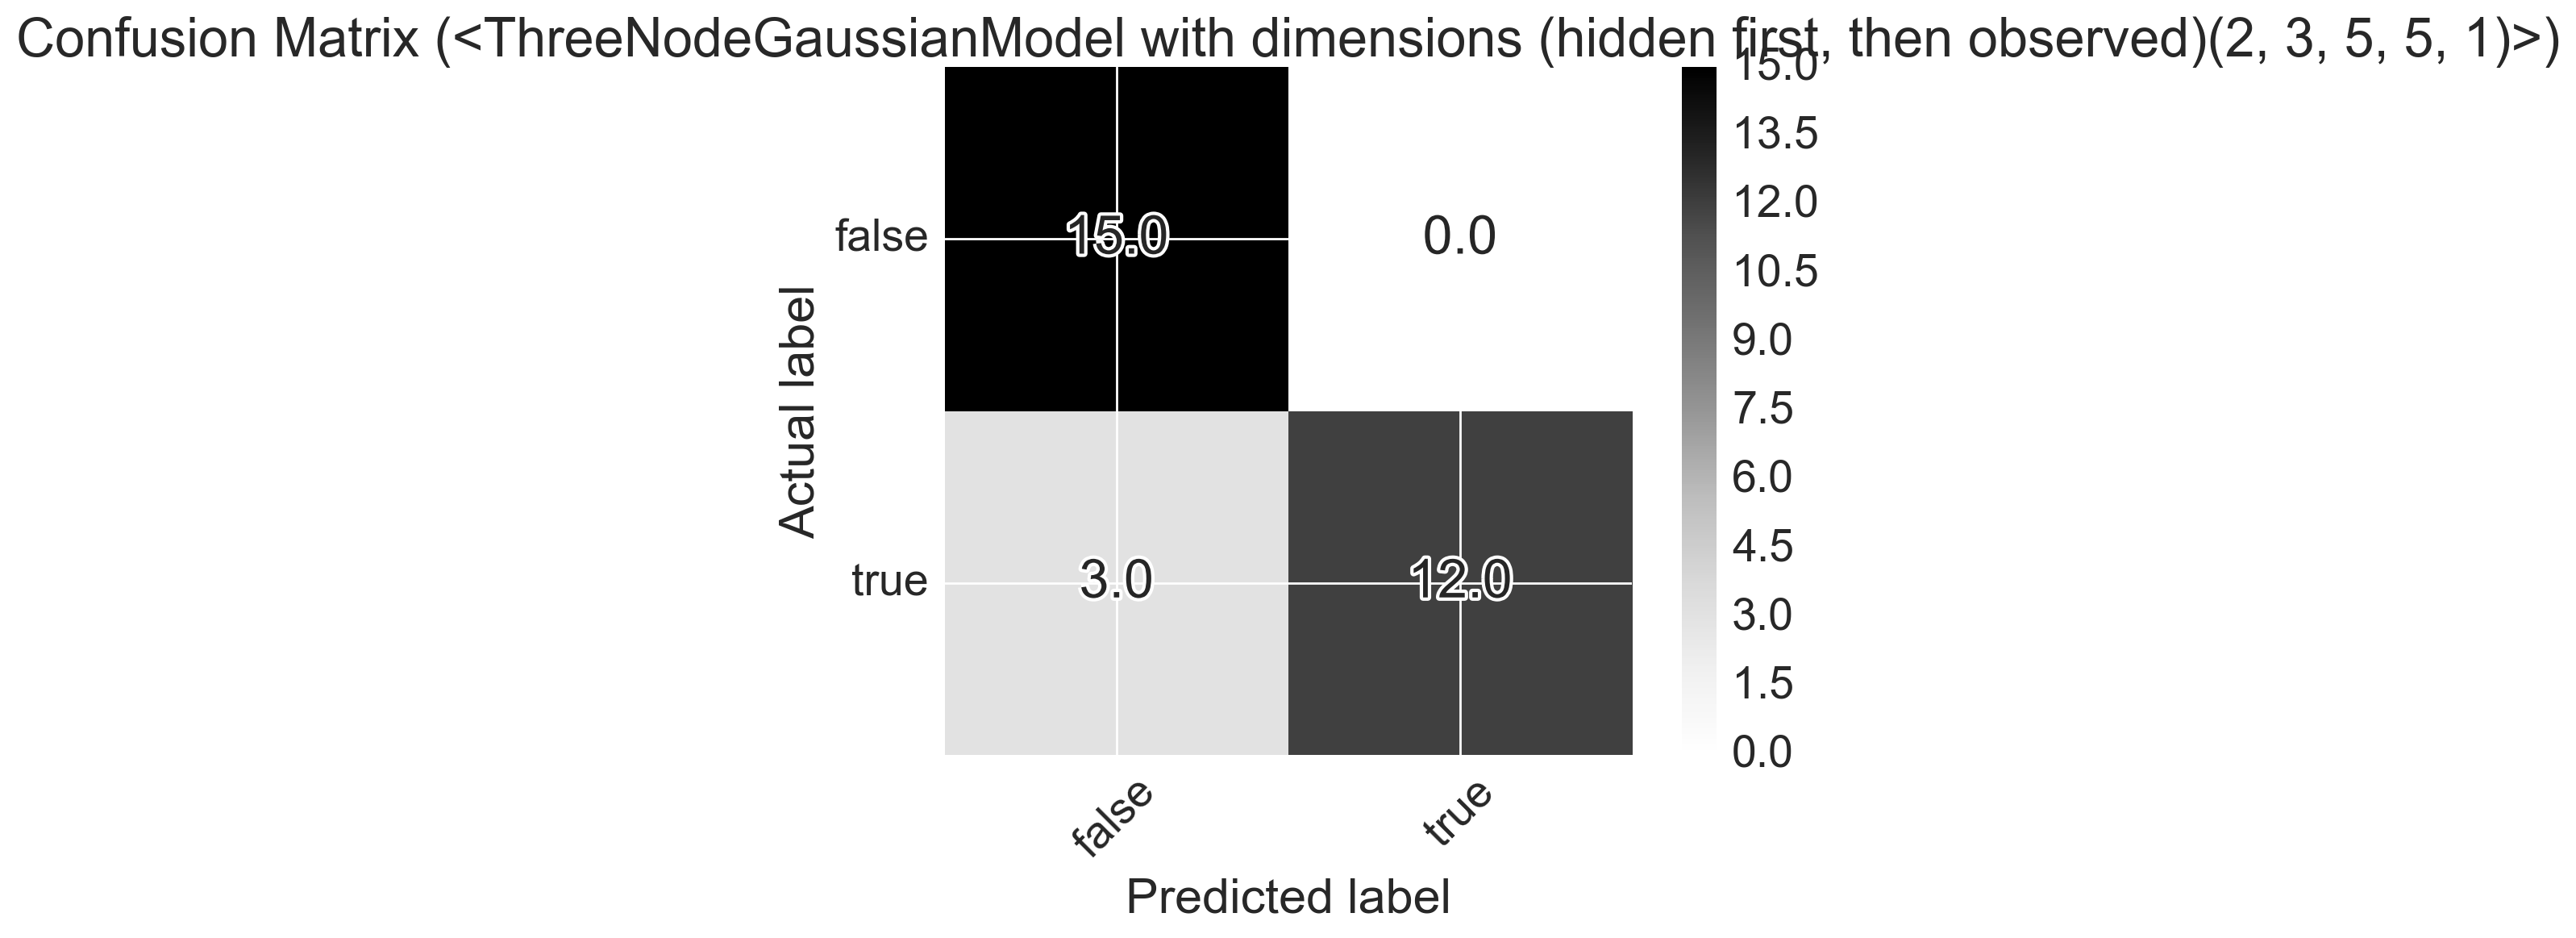

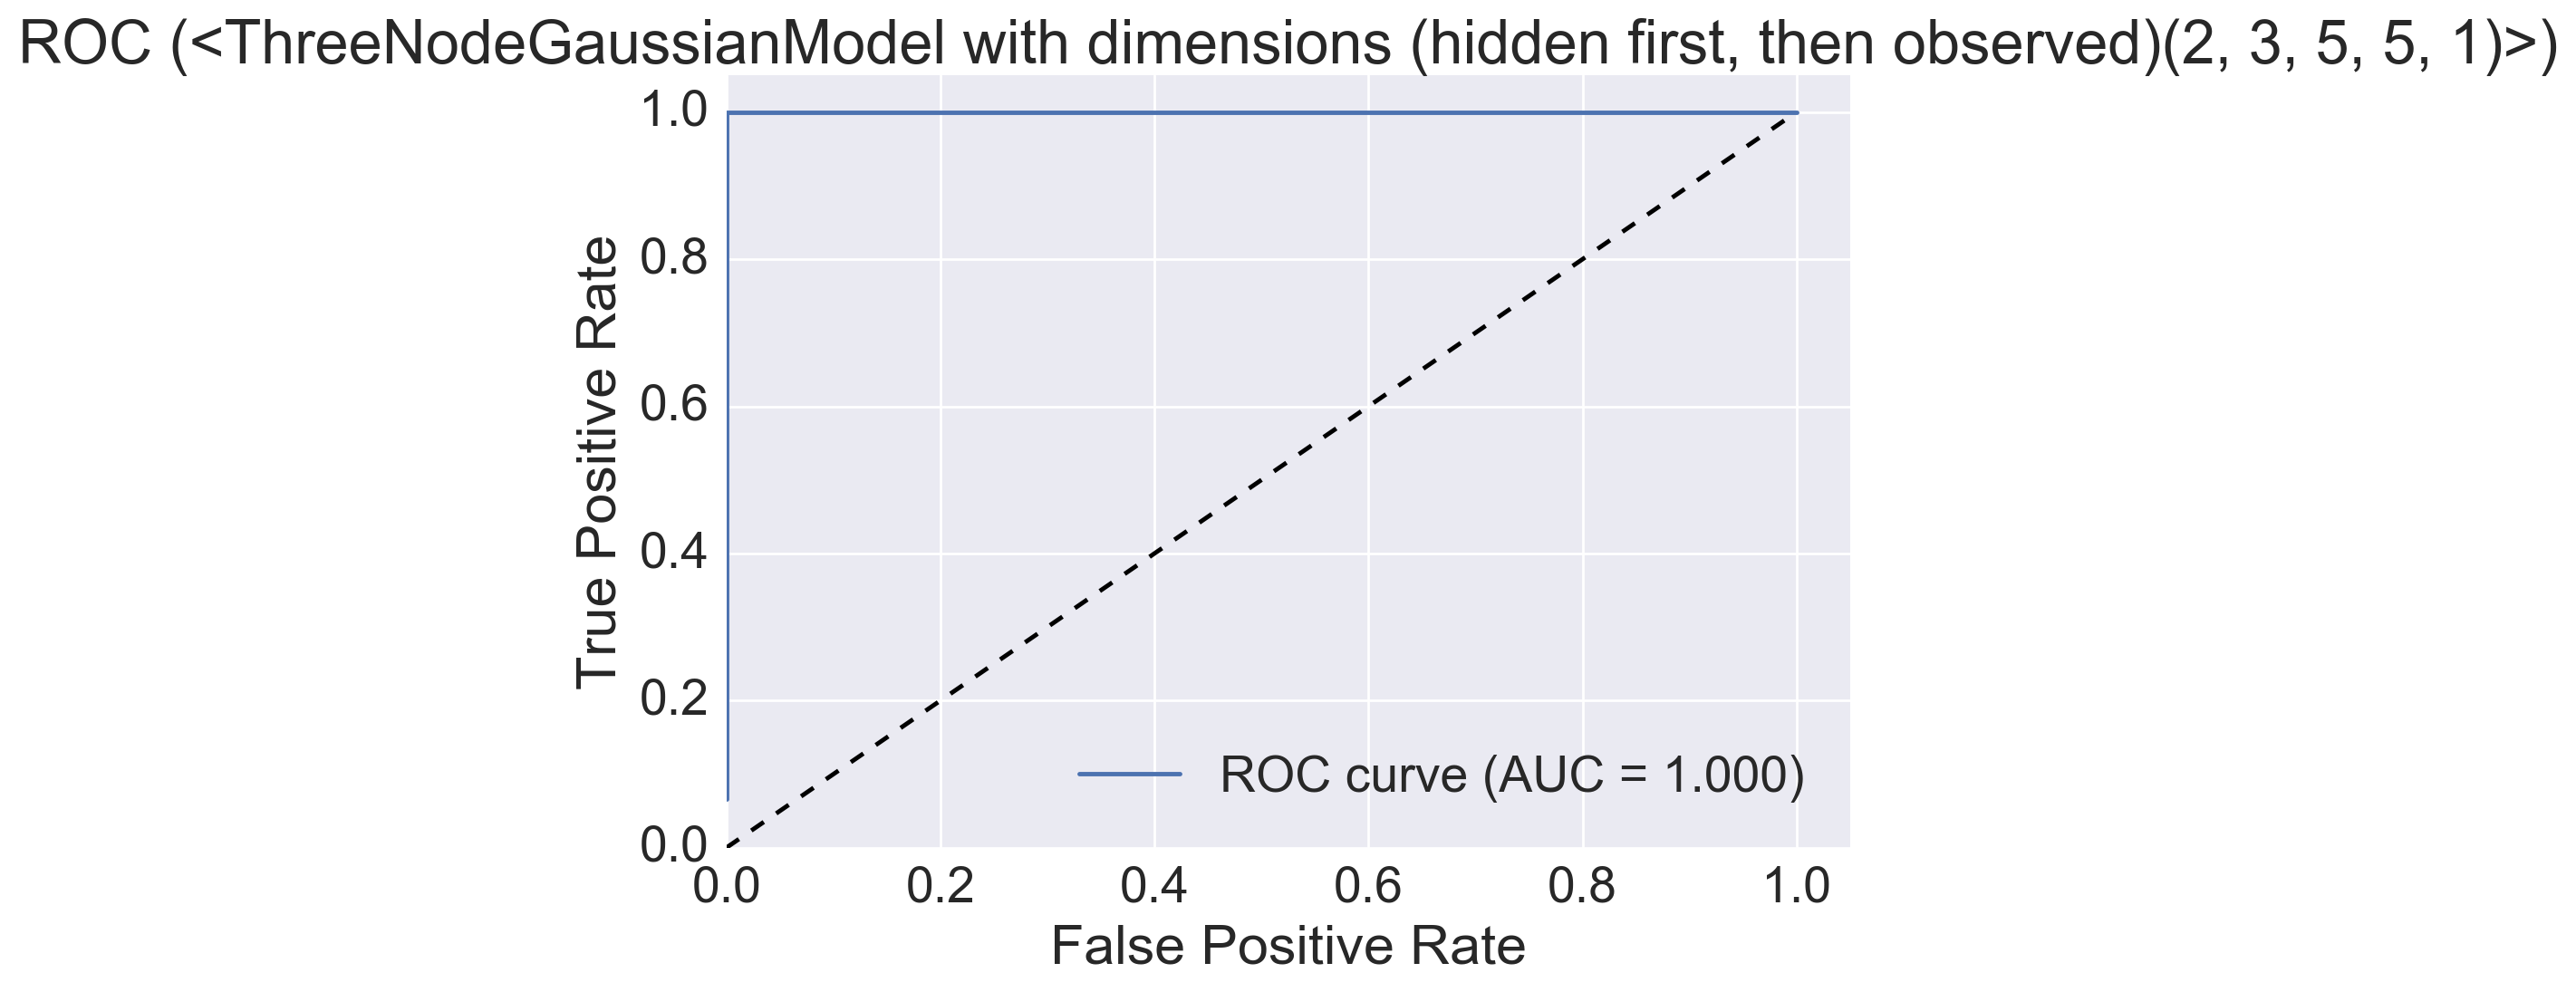

In [11]:
cv_mfaa.output_results()

Compare acutal to predicted.